In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
PyQip_folder = "D:\Repositories\PyQip"
import sys
sys.path.append(PyQip_folder)
# from PyQcv import PyQcv_class
# from PyQcv.PyQcv_class import *
import importlib
import gdspy
import numpy as np
# from PyQcv import detection
# from PyQcv import qubit_cv
# importlib.reload(detection)
# importlib.reload(qubit_cv)

# img_name = 'D:\Repositories\iPython-Notebooks\personal_folders\Thijs\Image Recognition\IR_photoshopped\A1\Image_13900.jpg'
# boremon = qubit_cv.boremon_qubit_cv(img_name,test=True)

## Import data

In [33]:
fit_yvals = {'data':np.array([t['S13'] for t in points])}
fit_xvals = {'f':np.array([t['f'] for t in points]),
             'lc':np.array([t['L_c'] for t in points])}
# print(fit_yvals)
# print(fit_xvals)

## Plotting the data from the simulation

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


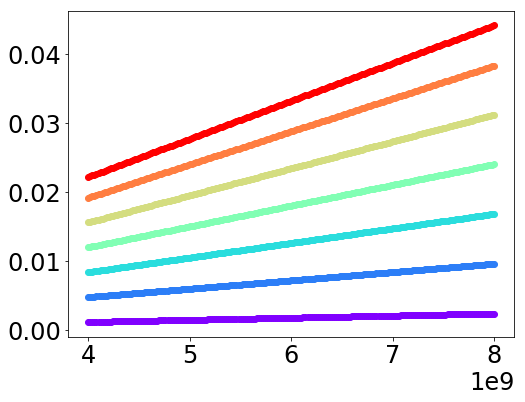

In [42]:
import matplotlib.cm as cm

x = np.arange(10)
ys = [i+x+(i*x)**2 for i in range(10)]

colors = cm.rainbow(np.linspace(0, 1, len(L_c)))
Colordict = {L_c[ii]:colors[ii] for ii in range(len(L_c))}

fig,ax = plt.subplots(1,1,figsize=(8,6))

for jj in range(len(fit_xvals['f'])):
    ax.plot(fit_xvals['f'][jj],fit_yvals['data'][jj],color=Colordict[fit_xvals['lc'][jj]], marker='o')

In [43]:
import lmfit
def S13(f,lc,A,B,C,D):
    return A*f*lc+B*lc+C*f+D

def res_fcn(params,S13,x_vals,data):
    cmp_values = S13(**x_vals, **params)
    res = cmp_values-data['data']
    return res
guess_dict = {'A':{'value':4.01e-15},
              'B':{'value':3.35e-8},
              'C':{'value':2.60e10-14},
              'D':{'value':4.55e-8}}
# complex_guess = {key:{'value':val} for key,val in hanger_fit_res.best_values.items()}
# complex_guess['f0'] = {'value':complex_guess['f0']['value']*1e9,
#             'min':self.proc_data_dict['plot_frequency'][0],
#             'max':self.proc_data_dict['plot_frequency'][-1]}
# complex_guess['Q'] = {'value':complex_guess['Q']['value'],
#             'min':complex_guess['Q']['value']*0.5,
#             'max':complex_guess['Q']['value']*2.}

params = lmfit.Parameters()
for key, val in list(guess_dict.items()):
# for key, val in guess_dict.items():
    params.add(key)
    for attr, attr_val in val.items():
        setattr(params[key], attr, attr_val)
fit_res = lmfit.minimize(fcn=res_fcn,
                params=params,
                args=(S13, fit_xvals, fit_yvals))

In [46]:
print(fit_res.params.valuesdict())

OrderedDict([('A', 8.738373136457076e-15), ('B', 5.0782161391245426e-07), ('C', -8.6652315432266653e-14), ('D', -9.3770393851303708e-05)])


## Plotting the data and the fit

NameError: name 'freqs1' is not defined

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


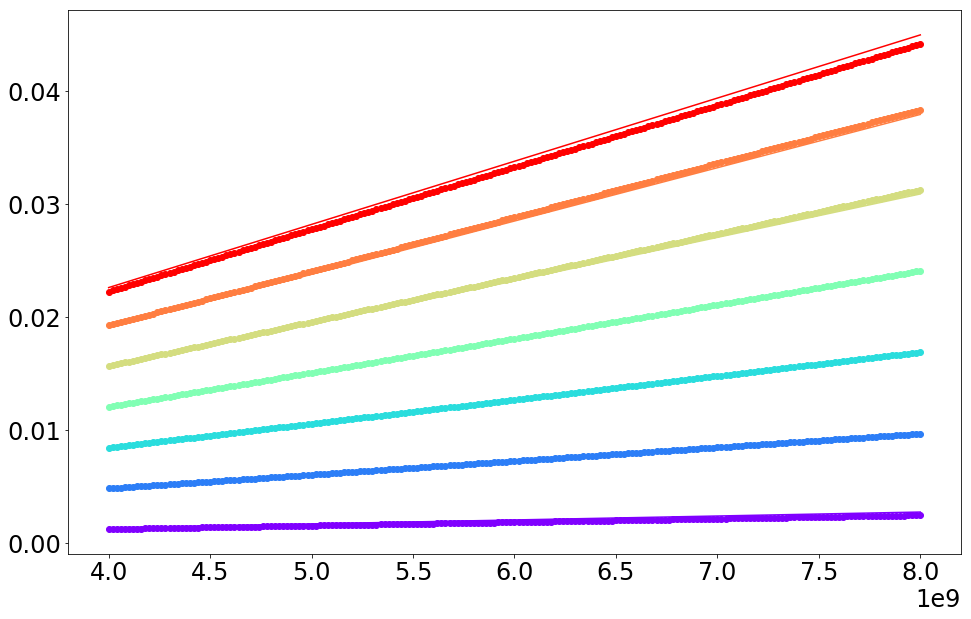

In [47]:
import matplotlib.cm as cm
import matplotlib
font_size = 24
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : font_size}
matplotlib.rc('font', **font)
matplotlib.rcParams.update({'font.size': font_size})
x = np.arange(10)
ys = [i+x+(i*x)**2 for i in range(10)]

colors = cm.rainbow(np.linspace(0, 1, len(L_c)))
Colordict = {L_c[ii]:colors[ii] for ii in range(len(L_c))}

fig,ax = plt.subplots(1,1,figsize=(16,10))

for jj in range(len(fit_xvals['f'])):
    ax.plot(fit_xvals['f'][jj],fit_yvals['data'][jj],color=Colordict[fit_xvals['lc'][jj]], marker='o')

for lc in L_c:
    freqs = np.linspace(min(fit_xvals['f']),max(fit_xvals['f']),1000)
    ax.plot(freqs,S13(freqs,lc,**fit_res.params.valuesdict()),color=Colordict[lc])
    
ax.plot(freqs1*1e9,np.sqrt(np.pi/2/qc))
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('S13')

## Import data and use only the data to post-dict the coupler length

In [32]:
Compiled_reso_data = np.load('Compiled_reso_data.npy').item()

In [33]:
Compiled_reso_data['20180904_Reso_Qi_vs_power'][0].keys()

dict_keys(['label', 'plot_label', 'resscans', 'color', 'res_timestamps', 'split_dicts', 'dicts', 'params', 'lower_freq', 'upper_freq', 'all_fields', 'initial_guess_f0s', 'all_fluxes', 'all_results', 'High_power_Qi', 'High_power_NPhot', 'High_power_field', 'Multiple_Photon_Levels_Qi', 'Multiple_Photon_Levels_NPhot', 'Multiple_Photon_Levels_field', 'Coupler_length', 'Filtered_Qc', 'Fitered_f0'])

In [34]:
# res_dics = np.load('20180904_Reso_Qi_vs_power.npy')
for key, res_dics in Compiled_reso_data.items():
    for res_dict in res_dics:
        res_dict['High_power_Qi'] = []
        res_dict['High_power_NPhot'] = []
        res_dict['High_power_field'] = []
        res_dict['Multiple_Photon_Levels_Qi'] = []
        res_dict['Multiple_Photon_Levels_NPhot'] = []
        res_dict['Multiple_Photon_Levels_field'] = []
        for tt, r_dict in enumerate(res_dict['all_results']):
            res_dict['High_power_Qi'].append(r_dict['Qi'][0]) # Qi at high power (large photon number)
            res_dict['High_power_NPhot'].append(r_dict['NPhot'][0]) # Photon number at high power
            if (len(r_dict['NPhot'])>1): # Measurements at multiple photon numbers are stored seperately
                res_dict['Multiple_Photon_Levels_Qi'].append(r_dict['Qi'])  # All the Qi at the various photon number levels
                res_dict['Multiple_Photon_Levels_NPhot'].append(r_dict['NPhot']) # All the photon numbes at the various levels

## Populate the fit data

In [102]:
fit_yvals = {'data':[]}
fit_xvals = {'f':[],
             'lc':[]}

for key,res_dics in Compiled_reso_data.items():
    for tt,res_dict in enumerate(res_dics):
        print(tt)
        s13 = np.sqrt(np.pi/2/np.array(res_dict['Filtered_Qc']))[0]
        fit_yvals['data'].append(s13)
        fit_xvals['f'].append(res_dict['Fitered_f0'][0]*1e9)
        fit_xvals['lc'].append(res_dict['Coupler_length'])
        

0
1
2
3
4
5
6
7
8
9
10
11
0
1
2
3
4
5
6
7
8
9
10
11


In [103]:
print(fit_yvals)
print(fit_xvals)
print(len(fit_xvals['lc']))

{'data': [0.011774986368068492, 0.011824149894112559, 0.012819083546554064, 0.012699801538270678, 0.012522764203224963, 0.011754285136203692, 0.011045262420663176, 0.010818765207422589, 0.011390705025028952, 0.012652760395217181, 0.019086671933215383, 0.02611877032618214, 0.012531641869161718, 0.013016635218815293, 0.014121529978143782, 0.015178313880936352, 0.015531134412419373, 0.016563857086517725, 0.016073492594840717, 0.017110841868510727, 0.018119711996417546, 0.0234012581144111, 0.024174850870813797, 0.025755758129164457]}
{'f': [5654593559.508535, 5743213049.985087, 5862873083.508718, 5953038600.098776, 6071027886.566246, 6168236430.465136, 6276467356.937584, 6485437627.705745, 6703305764.957479, 6897439944.897766, 7090016906.999388, 7470641609.785415, 5535220827.3732605, 5609565322.010208, 5782902123.207881, 5897983517.094812, 5982096094.72228, 6059955075.778246, 6248120740.510041, 6449935018.168146, 6606997474.599438, 6778628122.386061, 6903034513.862751, 7103406791.077348], 

Text(0.5,1,'$Q_\\mathrm{c}$ vs $f_\\mathrm{R}$ for all resonators')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


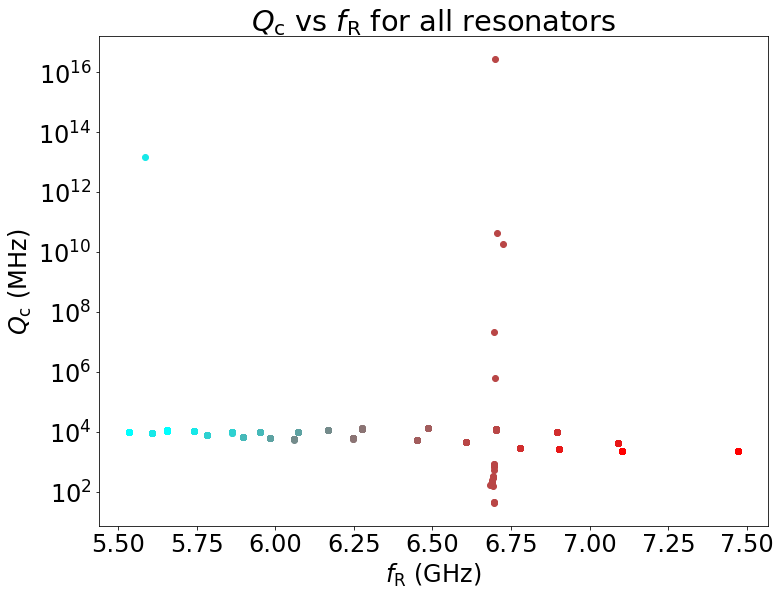

In [104]:
import matplotlib
font_size = 24
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : font_size}
matplotlib.rc('font', **font)
matplotlib.rcParams.update({'font.size': font_size})

figr = plt.figure(figsize=(12,9))
ax = figr.add_subplot(111)

for key,res_dics in Compiled_reso_data.items():
    for tt, res_dict in enumerate(res_dics):
            ax.semilogy(res_dict['all_results'][0]['f0'],np.array(res_dict['all_results'][0]['Qc']),
                    'o',color=res_dict['color'],label=res_dict['plot_label'])    


ax.set_ylabel(r'$Q_\mathrm{c}$ (MHz)')
ax.set_xlabel('$f_\mathrm{R}$ (GHz)')
ax.set_title('$Q_\mathrm{c}$ vs $f_\mathrm{R}$ for all resonators')
# ax.legend(loc='best')#, fontsize=16)
# ax.set_ylim(1e3,1e6)

# Filter the outlier

In [105]:
for kk, res_dict in enumerate(res_dics):
    res_dict['Filtered_Qc'] = []
    res_dict['Fitered_f0'] = []
    for tt, r_dict in enumerate(res_dict['all_results']):
        if r_dict['Qc'][tt]<1e5:
            res_dict['Filtered_Qc'].append(r_dict['Qc'][tt])
            res_dict['Fitered_f0'].append(r_dict['f0'][tt])

In [106]:
freqs1 = []
qc = []
for tt, res_dict in enumerate(res_dics):
    freqs1.extend(res_dict['Fitered_f0'])
    qc.extend(res_dict['Filtered_Qc'])
freqs1 = np.array(freqs1)
qc=np.array(qc)
print(freqs1)

[ 5.53522083  5.60956532  5.78290212  5.89798352  5.98209609  6.05995508
  6.24812074  6.44993502  6.60699747  6.77862812  6.90303451  7.10340679]


In [107]:
# fit_res.params.valuesdict()
import lmfit
def S13(f,lc,A,B,C,D):
    return A*f*lc+B*lc+C*f+D

def res_fcn(params,S13,x_vals,data):
    cmp_values = S13(**x_vals, **params)
    res = cmp_values-data['data']
    return res
guess_dict = {'A':{'value':-8.738373136457076e-15},
              'B':{'value':5.0782161391245426e-07},
              'C':{'value':8.6652315432266653e-14},
              'D':{'value':9.3770393851303708e-05}}
# complex_guess = {key:{'value':val} for key,val in hanger_fit_res.best_values.items()}
# complex_guess['f0'] = {'value':complex_guess['f0']['value']*1e9,
#             'min':self.proc_data_dict['plot_frequency'][0],
#             'max':self.proc_data_dict['plot_frequency'][-1]}
# complex_guess['Q'] = {'value':complex_guess['Q']['value'],
#             'min':complex_guess['Q']['value']*0.5,
#             'max':complex_guess['Q']['value']*2.}

params = lmfit.Parameters()
for key, val in list(guess_dict.items()):
# for key, val in guess_dict.items():
    params.add(key)
    for attr, attr_val in val.items():
        setattr(params[key], attr, attr_val)
        
# fit_yvals = {'data':np.array([t['S13'] for t in points])}
# fit_xvals = {'f':np.array([t['f'] for t in points]),
#              'lc':np.array([t['L_c'] for t in points])}
fit_xvals['f'] = np.array(fit_xvals['f'])
fit_xvals['lc'] = np.array(fit_xvals['lc'])
fit_yvals['data'] = np.array(fit_yvals['data'])

fit_res = lmfit.minimize(fcn=res_fcn,
                params=params,
                args=(S13, fit_xvals, fit_yvals))

In [108]:
fit_yvals

{'data': array([ 0.01177499,  0.01182415,  0.01281908,  0.0126998 ,  0.01252276,
         0.01175429,  0.01104526,  0.01081877,  0.01139071,  0.01265276,
         0.01908667,  0.02611877,  0.01253164,  0.01301664,  0.01412153,
         0.01517831,  0.01553113,  0.01656386,  0.01607349,  0.01711084,
         0.01811971,  0.02340126,  0.02417485,  0.02575576])}

Text(0.5,1,'$Q_\\mathrm{c}$ vs $f_\\mathrm{R}$ for all resonators')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


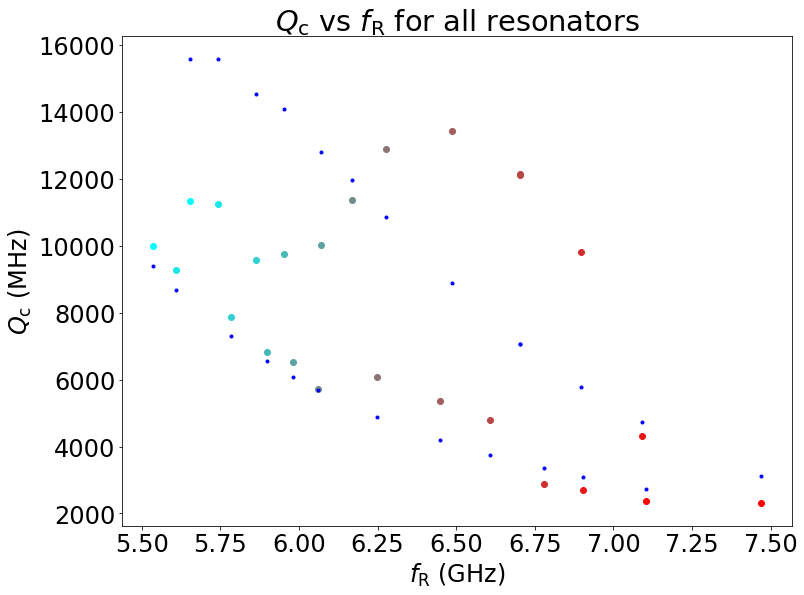

In [109]:
figr = plt.figure(figsize=(12,9))
ax = figr.add_subplot(111)

for key,res_dics in Compiled_reso_data.items():
    for tt, res_dict in enumerate(res_dics):
            ax.plot(res_dict['Fitered_f0'],np.array(res_dict['Filtered_Qc']),
                    'o',color=res_dict['color'],label=res_dict['plot_label'])  
            ax.plot(res_dict['Fitered_f0'],np.pi/2/S13(np.array(res_dict['Fitered_f0'])*1e9,
                                                       res_dict['Coupler_length'],
                                                       **fit_res.params.valuesdict())**2,'b.')

# for lc in [200]:
#     print(res_dict['Fitered_f0'])
#     freqs = np.linspace(min(freqs1),max(freqs1),1000)
#     ax.plot(freqs,np.pi/2/S13(freqs*1e9,lc,**fit_res.params.valuesdict())**2,color='blue')

ax.set_ylabel(r'$Q_\mathrm{c}$ (MHz)')
ax.set_xlabel('$f_\mathrm{R}$ (GHz)')
ax.set_title('$Q_\mathrm{c}$ vs $f_\mathrm{R}$ for all resonators')
# ax.legend(loc='best')#, fontsize=16)
# ax.set_ylim(1e3,1e6)

Text(0.5,1,'$Q_\\mathrm{c}$ vs $f_\\mathrm{R}$ for all resonators')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


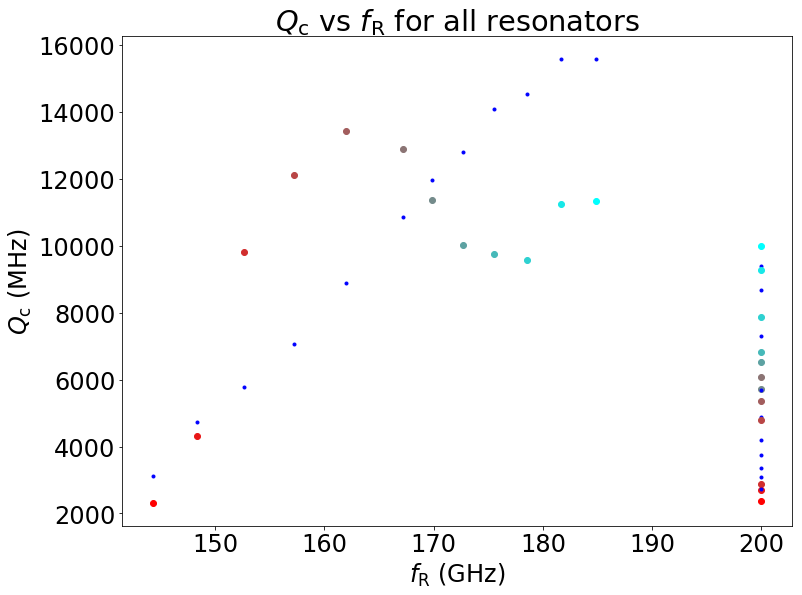

In [110]:
figr = plt.figure(figsize=(12,9))
ax = figr.add_subplot(111)

for key,res_dics in Compiled_reso_data.items():
    for tt, res_dict in enumerate(res_dics):
            ax.plot(res_dict['Coupler_length'],np.array(res_dict['Filtered_Qc'][0]),
                    'o',color=res_dict['color'],label=res_dict['plot_label'])  
            ax.plot(res_dict['Coupler_length'],np.pi/2/S13(np.array(res_dict['Fitered_f0'][0])*1e9,
                                                       res_dict['Coupler_length'],
                                                       **fit_res.params.valuesdict())**2,'b.')

# for lc in [200]:
#     print(res_dict['Fitered_f0'])
#     freqs = np.linspace(min(freqs1),max(freqs1),1000)
#     ax.plot(freqs,np.pi/2/S13(freqs*1e9,lc,**fit_res.params.valuesdict())**2,color='blue')

ax.set_ylabel(r'$Q_\mathrm{c}$ (MHz)')
ax.set_xlabel('$f_\mathrm{R}$ (GHz)')
ax.set_title('$Q_\mathrm{c}$ vs $f_\mathrm{R}$ for all resonators')
# ax.legend(loc='best')#, fontsize=16)
# ax.set_ylim(1e3,1e6)

In [ ]:
OrderedDict([('A', 8.738373136457076e-15),
             ('B', 5.0782161391245426e-07),
             ('C', -8.6652315432266653e-14),
             ('D', -9.3770393851303708e-05)])

In [111]:
fit_res.params.valuesdict()

OrderedDict([('A', -9.4782894279103366e-14),
             ('B', 0.00078074656551264411),
             ('C', 2.598589030282209e-11),
             ('D', -0.18213507223688821)])

In [112]:
fres = np.array([5.6e9,5.7e9,5.8e9,5.9e9,6.0e9,6.1e9,6.2e9,6.4e9,6.6e9,6.8e9,7.0e9,7.2e9])
print(len(fres))

12


In [113]:
resdict = fit_res.params.valuesdict()
Q_c = 15.0e3
S13 = np.sqrt(np.pi/2/Q_c)
print(S13)
print(fres)
Lc = (S13 - resdict['C']*fres-resdict['D'])/(resdict['A']*fres+resdict['B'])
print(Lc)

0.0102332670795
[  5.60000000e+09   5.70000000e+09   5.80000000e+09   5.90000000e+09
   6.00000000e+09   6.10000000e+09   6.20000000e+09   6.40000000e+09
   6.60000000e+09   6.80000000e+09   7.00000000e+09   7.20000000e+09]
[ 187.41763392  183.99873612  180.29927994  176.28325342  171.90820587
  167.12374151  161.86956954  149.64530639  134.43443403  114.99011583
   89.25929018   53.60536859]


In [94]:
resdict['C']*np.array(fres)

array([ 0.09883335,  0.10059823,  0.10236311,  0.10412799,  0.10589287,
        0.10765775,  0.10942264,  0.1129524 ,  0.11648216,  0.12001192,
        0.12354169,  0.12707145])